In [45]:
# directly using tree was not working so had to import thr sklearner separately 
import time as tm
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [46]:
pwd

'/Users/ssandesh/ML_Gatech/Project3'

In [47]:
dataset1 = pd.read_excel('datasets/Raisin_Dataset.xlsx')

In [48]:
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X  = dataset1.iloc[:, :-1]
Y =  dataset1.iloc[:, -1]
X = preprocessing.scale(X)

In [49]:
random_state = 7
clusters = np.arange(1,12,2)
sum_of_squared_distances = []
time_array = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X)
    end_time = tm.time()
    time_array.append(end_time - start_time)
    sum_of_squared_distances.append(kmeans.inertia_)


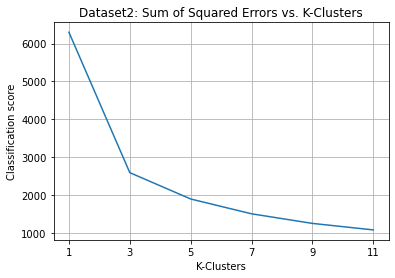

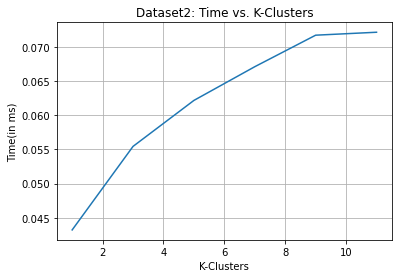

[0.043231964111328125, 0.05545306205749512, 0.0621790885925293, 0.06711196899414062, 0.07172203063964844, 0.07215309143066406]


In [58]:
plt.figure()
plt.plot(clusters,sum_of_squared_distances)
plt.title('Dataset2: Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Classification score")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array)
plt.title('Dataset2: Time vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()
print(time_array)

For n_clusters = 2 The average silhouette_score is : 0.4406396460227223
For n_clusters = 2 The average homogeneity_score is : 0.31486841586461106
For n_clusters = 3 The average silhouette_score is : 0.30917258926572305
For n_clusters = 3 The average homogeneity_score is : 0.42748619368104
For n_clusters = 4 The average silhouette_score is : 0.2949503624739898
For n_clusters = 4 The average homogeneity_score is : 0.39719150840103107
For n_clusters = 5 The average silhouette_score is : 0.2992355004541966
For n_clusters = 5 The average homogeneity_score is : 0.39367795377599873
For n_clusters = 6 The average silhouette_score is : 0.2741203073122193
For n_clusters = 6 The average homogeneity_score is : 0.4290956921085896
For n_clusters = 7 The average silhouette_score is : 0.26847769416199113
For n_clusters = 7 The average homogeneity_score is : 0.4486532898997205
For n_clusters = 8 The average silhouette_score is : 0.26240180210276803
For n_clusters = 8 The average homogeneity_score is : 

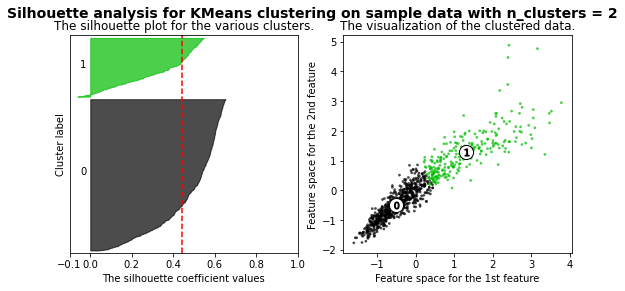

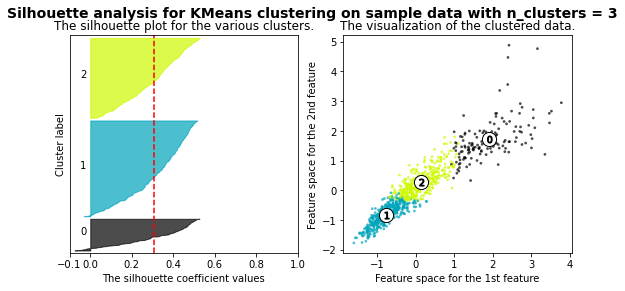

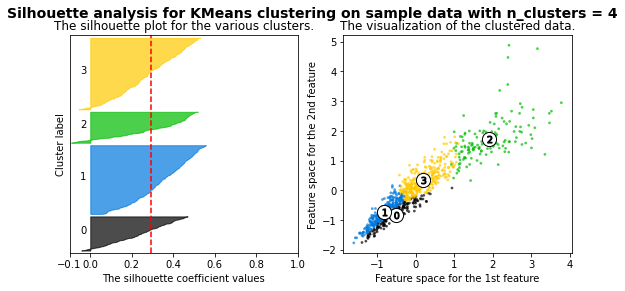

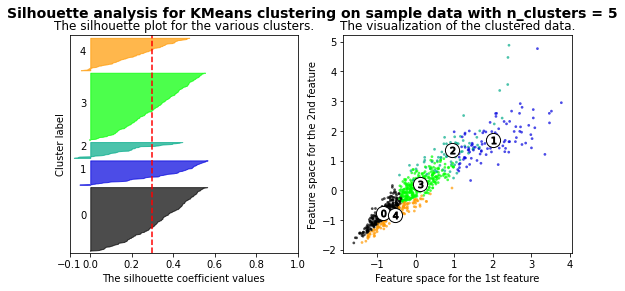

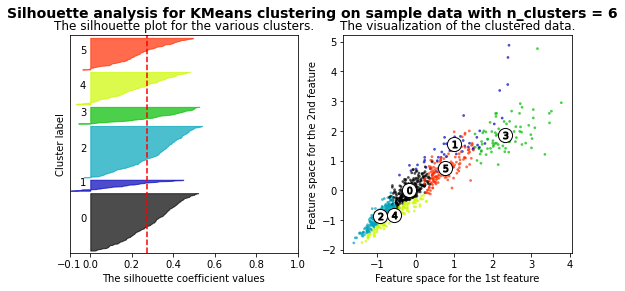

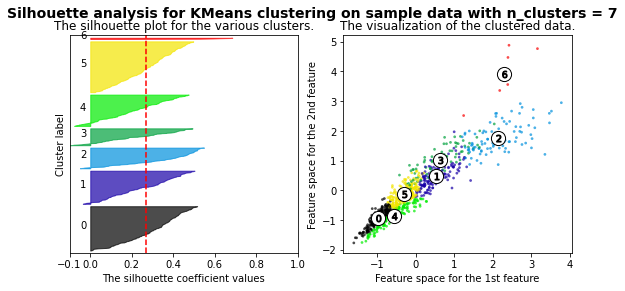

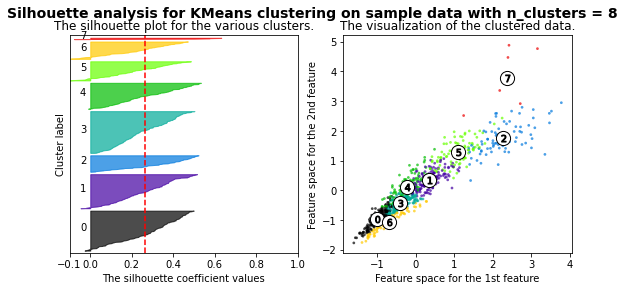

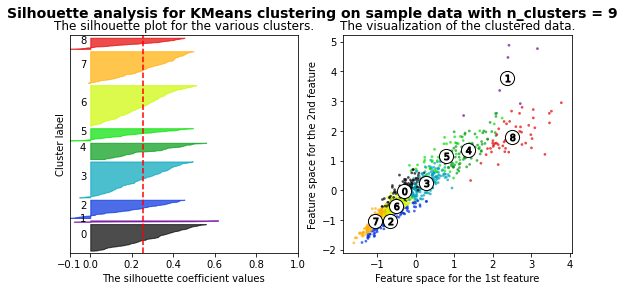

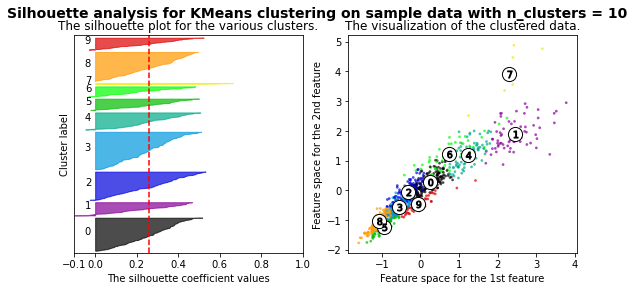

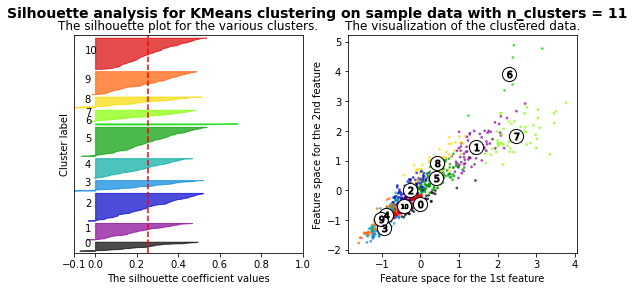

In [51]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = np.arange(2,12,1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X)
    homog_score = homogeneity_score(Y, cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Expectation Maximization

In [52]:
range_n_clusters = np.arange(2,15,1)
silhouette_scores = []
homog_scores = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    homog_score = homogeneity_score(Y, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores.append(silhouette_avg)
    homog_scores.append(homog_score)


For n_clusters = 2 The average silhouette_score is : 0.426947375214155
For n_clusters = 2 The average homogeneity_score is : 0.34508438362583654
For n_clusters = 3 The average silhouette_score is : 0.23362433328585616
For n_clusters = 3 The average homogeneity_score is : 0.3611534338495082
For n_clusters = 4 The average silhouette_score is : 0.18181987963196358
For n_clusters = 4 The average homogeneity_score is : 0.4207384667490833
For n_clusters = 5 The average silhouette_score is : 0.130582130910081
For n_clusters = 5 The average homogeneity_score is : 0.41502662500235954
For n_clusters = 6 The average silhouette_score is : 0.0973683393897487
For n_clusters = 6 The average homogeneity_score is : 0.44040715456239493
For n_clusters = 7 The average silhouette_score is : 0.17500020242815476
For n_clusters = 7 The average homogeneity_score is : 0.4585048440011831
For n_clusters = 8 The average silhouette_score is : 0.13505595040584897
For n_clusters = 8 The average homogeneity_score is :

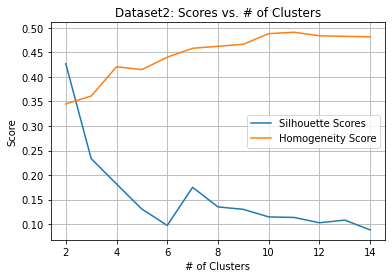

In [53]:
plt.figure()
plt.plot(range_n_clusters,silhouette_scores, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores,  label="Homogeneity Score")
plt.title('Dataset2: Scores vs. # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [54]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [59]:
n_clusters=np.arange(1, 15, 1)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X) 
        
        tmp_bic.append(gmm.bic(X))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)
    

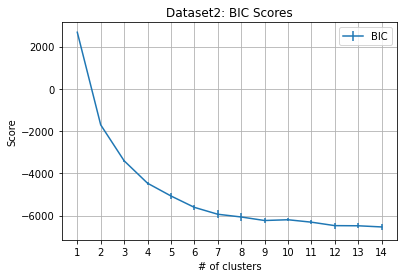

In [60]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("Dataset2: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()


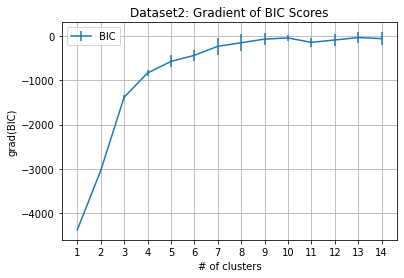

In [61]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Dataset2: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()